In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
print("First 5 Rows:")
print(data.head())

First 5 Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

In [5]:
print("Dataset Info:")
print(data.info())
print()
print("Missing Values:")
print(data.isnull().sum())
print()
print("Statistical Summary:")
print(data.describe())
print()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sug

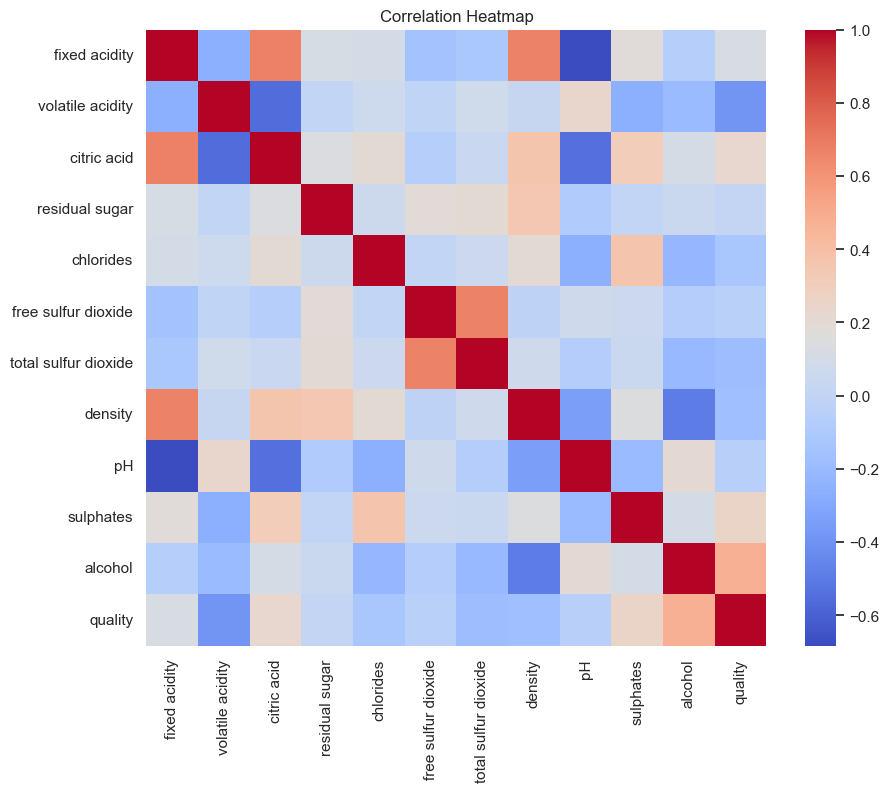

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Khurath\AppData\Local\Temp\ipykernel_8888\1506893318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette="plasma")


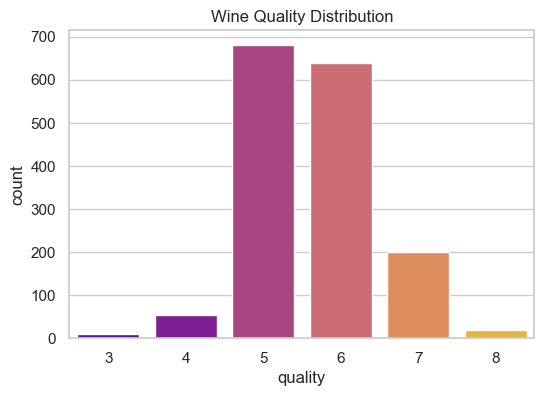

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=data, palette="plasma")
plt.title("Wine Quality Distribution")
plt.show()

C:\Users\Khurath\AppData\Local\Temp\ipykernel_8888\1545411964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette="cool")


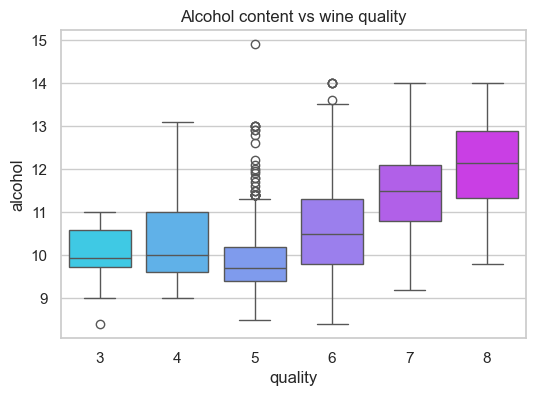

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='quality', y='alcohol', data=data, palette="cool")
plt.title("Alcohol content vs wine quality")
plt.show()

In [11]:
data['quality_label'] = data['quality'].apply(lambda x: 1 if x>=7 else 0)
print("\nConverted 'quality' into binary label (Good/Bad)/")
print(data['quality_label'].value_counts())


Converted 'quality' into binary label (Good/Bad)/
quality_label
0    1382
1     217
Name: count, dtype: int64


In [12]:
X = data.drop(['quality', 'quality_label'], axis=1)
Y = data['quality_label']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
Y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Model Evaluation:
Accuracy: 0.9

Confusion Matrix:
 [[264   9]
 [ 23  24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

